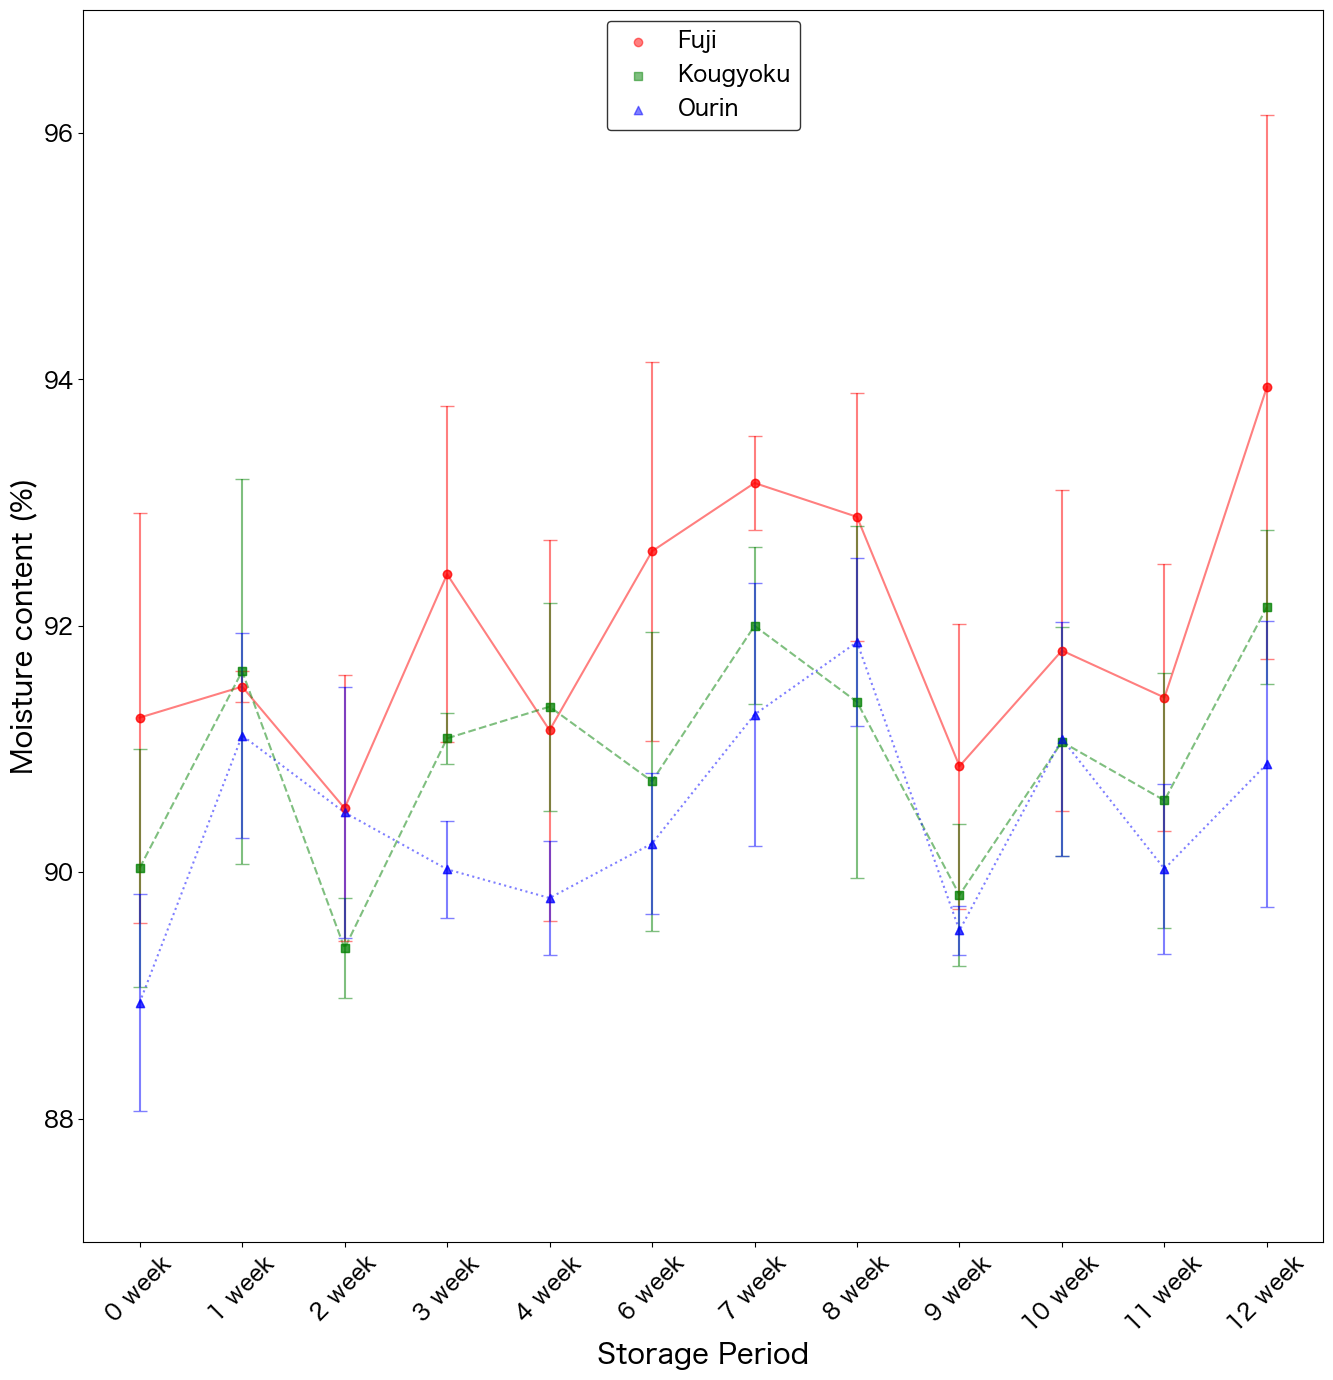

CPU times: user 5.18 s, sys: 1.44 s, total: 6.62 s
Wall time: 13.6 s


In [1]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./../data/moisture.xlsx',header=0)

# moisture raw data extract

moisture_fuji = df.iloc[:,5]
moisture_fuji = moisture_fuji[moisture_fuji != '#DIV/0!']

moisture_kougyoku = df.iloc[:,12]
moisture_kougyoku = moisture_kougyoku[moisture_kougyoku != '#DIV/0!']

moisture_ourin = df.iloc[:,19]
moisture_ourin = moisture_ourin[moisture_ourin != '#DIV/0!']

# make storage period label
storage_period = [f'{i} week' for i in range(13)]
# 5weeksは実験してないので、削除
storage_period.pop(5)

# moisture mean
loop_count = int(moisture_fuji.shape[0]/3)

mean_list_fuji = []
std_list_fuji = []
mean_list_kougyoku = []
std_list_kougyoku = []
mean_list_ourin = []
std_list_ourin = []
for i in range(loop_count):
    temp_fuji = np.mean(moisture_fuji[3*i:3*(i+1)])
    temp_fujii = np.std(moisture_fuji[3*i:3*(i+1)])
    temp_kougyoku = np.mean(moisture_kougyoku[3*i:3*(i+1)])
    temp_kougyokuu = np.std(moisture_kougyoku[3*i:3*(i+1)])
    temp_ourin = np.mean(moisture_ourin[3*i:3*(i+1)])
    temp_ourinn = np.std(moisture_ourin[3*i:3*(i+1)])
    
    mean_list_fuji.append(temp_fuji)
    mean_list_kougyoku.append(temp_kougyoku)
    mean_list_ourin.append(temp_ourin)
    std_list_fuji.append(temp_fujii)
    std_list_kougyoku.append(temp_kougyokuu)
    std_list_ourin.append(temp_ourinn)

# plot & save
xlabels = storage_period[:len(mean_list_fuji)]
fig = plt.figure(figsize=(16,16))

plt.scatter(xlabels,mean_list_fuji,c='r', marker='o',alpha=0.5,label='Fuji')
plt.scatter(xlabels,mean_list_kougyoku,c='g', marker='s',alpha=0.5,label='Kougyoku')
plt.scatter(xlabels,mean_list_ourin,c='b', marker='^',alpha=0.5,label='Ourin')

plt.plot(xlabels,mean_list_fuji,c='r',alpha=0.5)
plt.plot(xlabels,mean_list_kougyoku,c='g',linestyle="dashed",alpha=0.5)
plt.plot(xlabels,mean_list_ourin,c='b',linestyle="dotted",alpha=0.5)

plt.errorbar(xlabels,mean_list_fuji , yerr = std_list_fuji, capsize=5, fmt='o',c='r',alpha=0.5)
plt.errorbar(xlabels,mean_list_kougyoku , yerr = std_list_kougyoku, capsize=5, fmt='s',c='g',alpha=0.5)
plt.errorbar(xlabels,mean_list_ourin , yerr = std_list_ourin, capsize=5, fmt='^',c='b',alpha=0.5)

plt.xticks(fontsize=16,rotation=45)
plt.yticks(fontsize=16)
plt.xlabel('Storage Period',fontsize=20)
plt.ylabel('Moisture content (%)',fontsize=20)

plt.ylim(87,97)
plt.legend(fontsize=16,loc='upper center',edgecolor="black")
plt.show()


fig.savefig('./../output/図21_moisture_compare.png',dpi=400)